**Linear Regression : is a model that predicts relationship of direct proportionality between dependent and predictor variables.**

<img src="img/1.png">

#### Dataset

##### Source : FRED (https://fred.stlouisfed.org/)

* Target Variable : HPI or Housing Price Index 
    * It measures the prices changes of residential housing

* Predictor Variables
    * GDP
    * Unemployment
    * Interest Rates

!pip install statsmodels

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

sns.set_style('darkgrid')
%matplotlib inline

#### Import Data

In [2]:
hpi = pd.read_csv('dataset/monthly-hpi.csv')
uemp = pd.read_csv('dataset/unemployment-macro.csv')
ffr = pd.read_csv('dataset/fed_funds.csv')
shiller = pd.read_csv('dataset/shiller.csv')
gdp = pd.read_csv('dataset/gdp.csv')

In [3]:
df = (shiller.merge(hpi,on='date')
      .merge(uemp,on='date')
      .merge(ffr,on='date')
      .merge(gdp,on='date'))

In [4]:
gdp.head(10)

,date,total_expenditures,labor_force_pr,producer_price_index,gross_domestic_product
0,2011-01-01,5766.7,64.2,192.7,14881.3
1,2011-04-01,5870.8,64.2,203.1,14989.6
2,2011-07-01,5802.6,64.0,204.6,15021.1
3,2011-10-01,5812.9,64.1,201.1,15190.3
4,2012-01-01,5765.7,63.7,200.7,15291.0
5,2012-04-01,5771.2,63.7,203.7,15362.4
6,2012-07-01,5745.4,63.7,200.1,15380.8
7,2012-10-01,5841.4,63.8,203.5,15384.3
8,2013-01-01,5748.0,63.6,202.5,15491.9
9,2013-04-01,5756.8,63.4,203.5,15521.6


#### Exploratory Data Analysis : Figure out the best predictors for our dependent variables

    * Plotting
    * Descriptive Stats
    
    
##### OLS : Ordinary Least Squares : statistical method that helps estimate the relationship between independent and dependent variables by minimising the sum of squares in difference between observed and predicted values

##### OLS or Linear Regression Assumptions

1. Linearity :
    * dependent and independent variables have linear relationship
    
    
2. No Multicollinearity
    * independent variables are not correlated with each other.
    * if predictors are highly correlated, then removing them shouldn't drastically reduce adjusted R-squared
    
    
3. Zero Conditional Mean
    * Average of distances i.e. residuals between observations and trend line is zero
    
    
4. Homoskedasticity
    * Variance is constant
    * No pattern in residuals
    
    
5. No Autocorrelation
    * Autocorrelation is a variable correlated to itself across observations.

# Largest
## Smaller
### Even Smaller
#### Penultimate Smallest
##### Smallest with Italics

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   date                            23 non-null     object 
 1   sp500                           23 non-null     float64
 2   consumer_price_index            23 non-null     float64
 3   long_interest_rate              23 non-null     float64
 4   housing_price_index             23 non-null     float64
 5   total_unemployed                23 non-null     float64
 6   more_than_15_weeks              23 non-null     int64  
 7   not_in_labor_searched_for_work  23 non-null     int64  
 8   multi_jobs                      23 non-null     int64  
 9   leavers                         23 non-null     float64
 10  losers                          23 non-null     float64
 11  federal_funds_rate              23 non-null     float64
 12  total_expenditures              23 non

### Simple Linear Regression with 1 predictor and 1 target variable

In [6]:
df.columns

Index(['date', 'sp500', 'consumer_price_index', 'long_interest_rate',
       'housing_price_index', 'total_unemployed', 'more_than_15_weeks',
       'not_in_labor_searched_for_work', 'multi_jobs', 'leavers', 'losers',
       'federal_funds_rate', 'total_expenditures', 'labor_force_pr',
       'producer_price_index', 'gross_domestic_product'],
      dtype='object')

In [7]:
housing_model = ols('housing_price_index ~ total_unemployed',data=df).fit()

housing_model_summary = housing_model.summary()

In [8]:
housing_model_summary    

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     housing_price_index   R-squared:                       0.952
Model:                             OLS   Adj. R-squared:                  0.949
Method:                  Least Squares   F-statistic:                     413.2
Date:                 Sun, 08 Nov 2020   Prob (F-statistic):           2.71e-15
Time:                         19:23:28   Log-Likelihood:                -65.450
No. Observations:                   23   AIC:                             134.9
Df Residuals:                       21   BIC:                             137.2
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          313.3128      5.408     57.938      0.000     302.067     324.559
total_unemployed    -8.3324      0.410    -20.327      0.000      -9.185      -7.480
==============================================================================
Omnibus:                        0.492   Durbin-Watson:                   1.126
Prob(Omnibus):                  0.782   Jarque-Bera (JB):                0.552
Skew:                           0.294   Prob(JB):                        0.759
Kurtosis:                       2.521   Cond. No.                         78.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Accuracy Metrics

* RMSE - Lower the better


* R-Squared - Higher the better - proportion of variance of a dependent variable explained by an independent variable.


* Adj R-Squared - this metrics compensates the addition of variables. It will increase by addition of significant variables and decrease by addition of insignificant variables. Adj R-Squared <= R-squared
    
    * Value of adj R-sqrd = 0.949 - 94.9% of the housing prices can be explained by our predictor variable (total_unemployed)
    

* Regression Coeff.
    
    * Intercept - 313.3128 
    
    * total_unemployed - -8.3324
    
    * housing_price_index = -8.3324 * total_unemployed + 313.3128
    
    * Given all the other factors as constant, 1 unit change in total_unemployed will result in -8.3324 units change in housing_price_index.
    
    
* Standard Error - Measure of accuracy. Estimates the variation of coefficient if same test were to run on a different sample. Std. Err. -0.41 pretty low.


* p-value (P>|t|)
    * p-val<0.05 - significant
    * p-val>=0.05 - insignificant
    
    
* Confidence Interval ([0.025	0.975])
    * Range with in which our coefficient is likely to fall
    * We can be 95% confident that our coefficient of total_unemployed will be within range or confidence interval of [-9.185,-7.480]
    

* Durbin-Watson - 1.126
    * Gives the measure of autocorrelation
    * Not to be under 1 or over 3
    

* F-Statistic - 413.2
    * overall significance of linear regression model

#### Regression plots

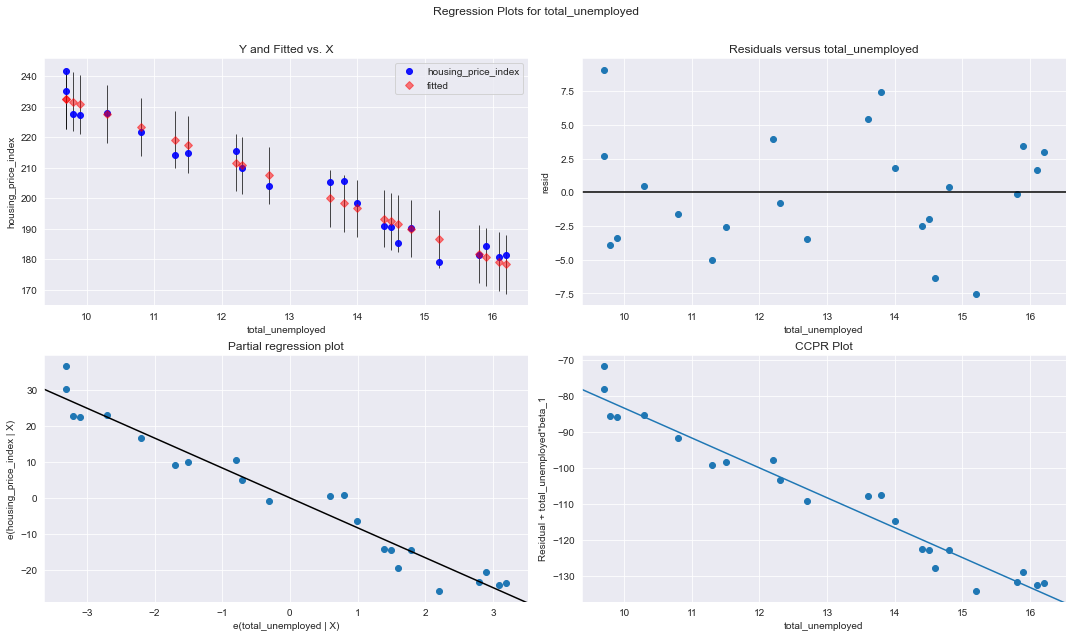

In [9]:
fig = plt.figure(figsize=(15,9))

fig = sm.graphics.plot_regress_exog(housing_model,"total_unemployed",fig=fig)

#### Multiple Linear Regression

* consumer_price_index


* long_interest_rate


* gross_domestic_product


* total_unemployed


* federal_funds_rate

In [11]:
housing_model2 = ols("""housing_price_index ~ total_unemployed 
                                              + long_interest_rate
                                              + federal_funds_rate
                                              + consumer_price_index
                                              + gross_domestic_product""",data=df).fit()

In [12]:
housing_model_summary2 = housing_model2.summary()

In [13]:
housing_model_summary2

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     housing_price_index   R-squared:                       0.980
Model:                             OLS   Adj. R-squared:                  0.974
Method:                  Least Squares   F-statistic:                     168.5
Date:                 Sun, 08 Nov 2020   Prob (F-statistic):           7.32e-14
Time:                         19:24:50   Log-Likelihood:                -55.164
No. Observations:                   23   AIC:                             122.3
Df Residuals:                       17   BIC:                             129.1
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -389.2234    187.252     -2.079      0.053    -784.291       5.844
total_unemployed          -0.1727      2.399     -0.072      0.943      -5.234       4.889
long_interest_rate         5.4326      1.524      3.564      0.002       2.216       8.649
federal_funds_rate        32.3750      9.231      3.507      0.003      12.898      51.852
consumer_price_index       0.7785      0.360      2.164      0.045       0.020       1.537
gross_domestic_product     0.0252      0.010      2.472      0.024       0.004       0.047
==============================================================================
Omnibus:                        1.363   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.506   Jarque-Bera (JB):                1.043
Skew:                          -0.271   Prob(JB):                        0.594
Kurtosis:                       2.109   Cond. No.                     4.58e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Adding new variables decreased the impact of total_unemployed to housing_price_index**

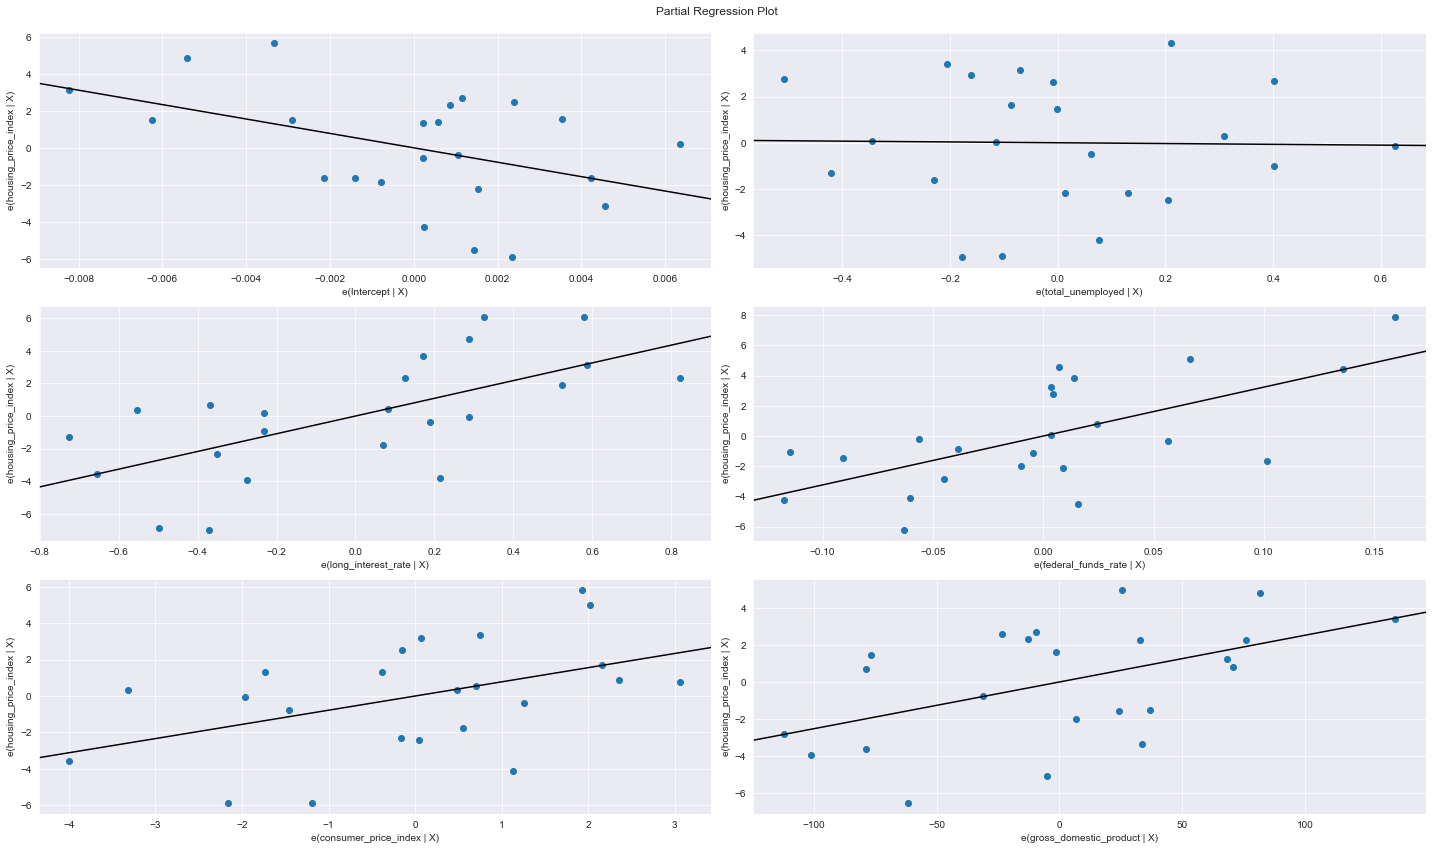

In [14]:
fig = plt.figure(figsize=(20,12))

fig = sm.graphics.plot_partregress_grid(housing_model2,fig=fig)

**Conclusion:**

1. Simple Linear Regression


2. Multiple Linear Regression


3. Prediction of housing price index given macroeconomic indicators


**Homework**

4. Checking of Multicollinearity. Hint : VIF in python / VIF statsmodels

**Optional Homework**
5. Merge strategy can be improved. Right now our DF has only 23 rows. Try to get more rows.

# Great Job !